In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 22.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 28.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 20.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 11.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 16.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 26.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 8.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 25.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 6.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 19.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 10.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil/laterite 9.png
/kaggle/input/d/matshidiso/soil-types/Soil Types/Lateri

## Link Dataset https://www.kaggle.com/datasets/matshidiso/soil-types/data

In [4]:
import os 
import numpy as np

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import recall_score, f1_score
import re
from sklearn.metrics import confusion_matrix


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths to your classes
class_1_path = '/kaggle/input/d/matshidiso/soil-types/Soil Types/Alluvial soil'
class_2_path = '/kaggle/input/d/matshidiso/soil-types/Soil Types/Clayey soils'
class_3_path = '/kaggle/input/d/matshidiso/soil-types/Soil Types/Laterite soil'
class_4_path = '/kaggle/input/d/matshidiso/soil-types/Soil Types/Loamy soil'
class_5_path = '/kaggle/input/d/matshidiso/soil-types/Soil Types/Sandy loam'
class_6_path = '/kaggle/input/d/matshidiso/soil-types/Soil Types/Sandy soil'

# Specify the paths for train and valid sets
train_path = '/kaggle/working/train'
valid_path = '/kaggle/working/valid'

# Create train and valid directories if they don't exist
for class_path in [train_path, valid_path]:
    for soil_class in ['Alluvial Soil', 'Clayey Soil', 'Laterite Soil', 'Loamy Soil', 'Sandy loam', 'Sandy soil']:
        os.makedirs(os.path.join(class_path, soil_class), exist_ok=True)

# Define the train-test split ratio (e.g., 80-20)
split_ratio = 0.8

# Function to copy files
def copy_files(file_list, src_path, dest_path):
    for file_name in file_list:
        src_file = os.path.join(src_path, file_name)
        dest_file = os.path.join(dest_path, file_name)
        shutil.copy(src_file, dest_file)

# Split each class into train and valid sets
train_class_1, valid_class_1 = train_test_split(os.listdir(class_1_path), train_size=split_ratio)
train_class_2, valid_class_2 = train_test_split(os.listdir(class_2_path), train_size=split_ratio)
train_class_3, valid_class_3 = train_test_split(os.listdir(class_3_path), train_size=split_ratio)
train_class_4, valid_class_4 = train_test_split(os.listdir(class_4_path), train_size=split_ratio)
train_class_5, valid_class_5 = train_test_split(os.listdir(class_5_path), train_size=split_ratio)
train_class_6, valid_class_6 = train_test_split(os.listdir(class_6_path), train_size=split_ratio)

# Copy files to the appropriate directories
copy_files(train_class_1, class_1_path, os.path.join(train_path, 'Alluvial Soil'))
copy_files(valid_class_1, class_1_path, os.path.join(valid_path, 'Alluvial Soil'))

copy_files(train_class_2, class_2_path, os.path.join(train_path, 'Clayey Soil'))
copy_files(valid_class_2, class_2_path, os.path.join(valid_path, 'Clayey Soil'))

copy_files(train_class_3, class_3_path, os.path.join(train_path, 'Laterite Soil'))
copy_files(valid_class_3, class_3_path, os.path.join(valid_path, 'Laterite Soil'))

copy_files(train_class_4, class_4_path, os.path.join(train_path, 'Loamy Soil'))
copy_files(valid_class_4, class_4_path, os.path.join(valid_path, 'Loamy Soil'))

copy_files(train_class_5, class_5_path, os.path.join(train_path, 'Sandy loam'))
copy_files(valid_class_5, class_5_path, os.path.join(valid_path, 'Sandy loam'))

copy_files(train_class_6, class_6_path, os.path.join(train_path, 'Sandy soil'))
copy_files(valid_class_6, class_6_path, os.path.join(valid_path, 'Sandy soil'))


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Set the input image size for the VGGNet model
input_shape = (224, 224, 3)
classes = ['Alluvial Soil', 'Clayey Soil', 'Laterite Soil', 'Loamy Soil', 'Sandy loam', 'Sandy soil']

# Define the path to your dataset folder
img_height, img_width = 256, 256
batch_size = 64

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Flow data from the training directory
train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes = classes,
    class_mode='categorical'  # Set to 'binary' or 'categorical' based on your problem
)

# Create an ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# Flow data from the validation directory
validation_generator = val_datagen.flow_from_directory(
    '/kaggle/working/valid',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes = classes,
    class_mode='categorical'
)

Found 112 images belonging to 6 classes.
Found 32 images belonging to 6 classes.


In [7]:
mobilenet_v2 = MobileNetV2(weights='imagenet', include_top=False)

for layer in mobilenet_v2.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [8]:
# Add custom layers on top of the base model
x = mobilenet_v2.output
x = GlobalAveragePooling2D()(x)  # Pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(len(classes), activation='softmax')(x)  # Output layer

# Create the final model
model = tf.keras.Model(inputs=mobilenet_v2.input, outputs=predictions)


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                                           

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',  # Standard metric
                       tf.keras.metrics.Recall()])

In [11]:
results = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=1)

Epoch 1/100
2/2 [==============================] - 13s 4s/step - loss: 2.3474 - accuracy: 0.2143 - recall: 0.1429 - val_loss: 1.4247 - val_accuracy: 0.4688 - val_recall: 0.4062
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 1.5703 - accuracy: 0.4821 - recall: 0.3929 - val_loss: 1.3076 - val_accuracy: 0.5625 - val_recall: 0.4062
Epoch 3/100
2/2 [==============================] - 3s 2s/step - loss: 1.0487 - accuracy: 0.6429 - recall: 0.4911 - val_loss: 0.8461 - val_accuracy: 0.6875 - val_recall: 0.5625
Epoch 4/100
2/2 [==============================] - 3s 2s/step - loss: 0.7375 - accuracy: 0.6964 - recall: 0.6071 - val_loss: 0.9054 - val_accuracy: 0.7188 - val_recall: 0.5000
Epoch 5/100
2/2 [==============================] - 3s 2s/step - loss: 0.7214 - accuracy: 0.7411 - recall: 0.6875 - val_loss: 0.8160 - val_accuracy: 0.6250 - val_recall: 0.5938
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 0.5986 - accuracy: 0.7857 - recall: 0.7232 - val_

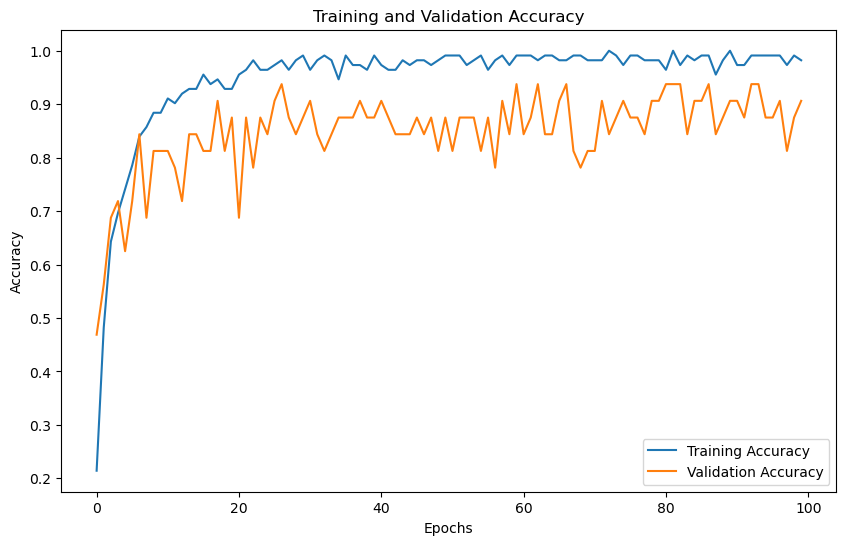

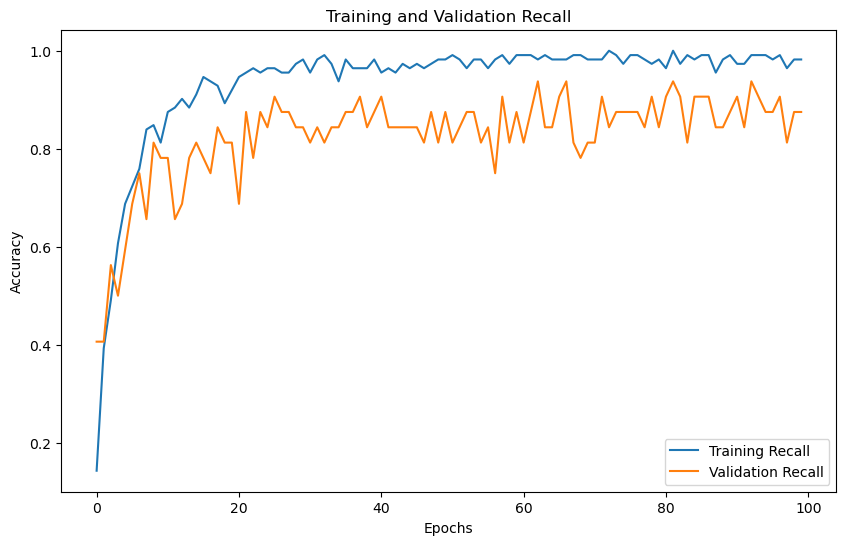

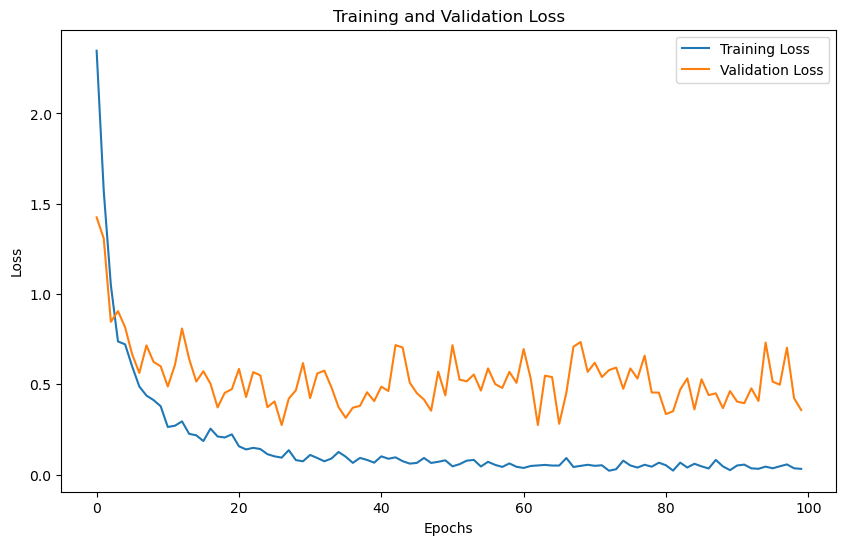

In [12]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation recall
plt.figure(figsize=(10, 6))
plt.plot(results.history['recall'], label='Training Recall')
plt.plot(results.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Recall')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
model.evaluate(validation_generator)

1/1 [==============================] - 1s 823ms/step - loss: 0.4572 - accuracy: 0.8750 - recall: 0.8750


[0.4571828842163086, 0.875, 0.875]

In [14]:
from keras.models import load_model
model.save('model_soil.h5') # creates a HDF5 file 'my_model.h5'

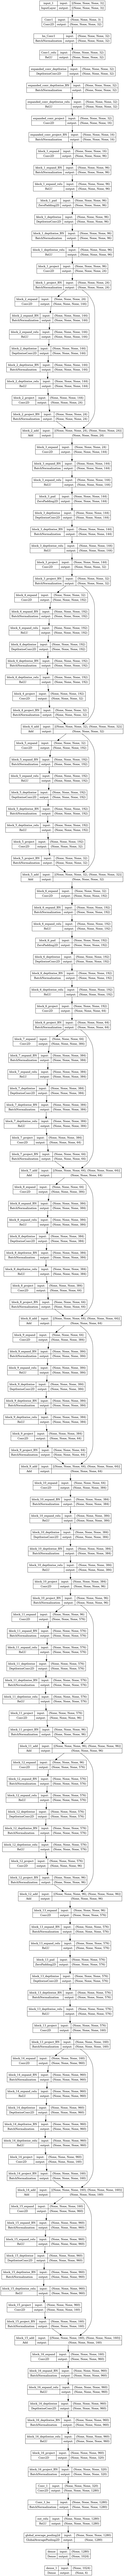

In [15]:
tf.keras.utils.plot_model(model, to_file='model_layers.png', show_shapes=True, show_layer_names=True)
